In [189]:
import numpy as np
from sympy import integrate, log, exp, oo, sin, plot
from sympy.abc import x,y
import scipy.integrate as inte
import matplotlib.pyplot as plt
import time
%matplotlib inline

from sympy.utilities.lambdify import lambdify, implemented_function
from sympy import Function
import sympy as sympy
from numpy import random as rd
from scipy import linalg

In [149]:
class FunctionalFunction(object):
    def __init__(self, func,field):
        self.func = func
        self.field = field
    def __call__(self, x):
        return self.func(x)
    def __add__(self, other):
        return FunctionalFunction(lambda x: self(x)+other(x),self.field)
f = FunctionalFunction(lambda x: x,1)
g = FunctionalFunction(lambda x: x**2,1)
h = f+g
print(f(2)+g(2))
print(h(6))

6
42


In [165]:
class ScalarFunction(object):
    def __init__(self, func, weight, left_lim, right_lim):
        self.func = func
        self.weight = weight
        self.left_lim = left_lim
        self.right_lim = right_lim
        
    def __call__(self, x):
        return self.func(x)

    
    def __add__(self, other):
        #if self.left_lim!=other.left_lim or self.right_lim!=other.right_lim:
        #    raise RuntimeError
        #if self.weight.__code__.co_code!=other.weight.__code__.co_code:
        #    raise RuntimeError

        return ScalarFunction(lambda x: self(x) + other(x), self.weight, self.left_lim, self.right_lim)

In [166]:
f = ScalarFunction(lambda x: x,1,1,1)
g = ScalarFunction(lambda x: x**2,1,1,1)
h = f+g
print(f(2)+g(2))
print(h(6))

6


TypeError: unsupported operand type(s) for +: 'int' and 'ScalarFunction'

In [2]:
def gram_schmidt_sym(list_of_func,left_lim,right_lim):
    new_list = []
    if len(list_of_func)==0:
        raise RuntimeError
    new_list.append(list_of_func[0])
    for i in range(1,len(list_of_func)):
        new_list.append(get_basis_func_sym(new_list,list_of_func,i,left_lim,right_lim))
    return new_list

In [3]:
def get_basis_func_sym(new_list,list_of_func,k,left_lim,right_lim):
    new_func = list_of_func[k]
    for j in range(k):
        new_func = new_func - projection_sym(new_list[j],list_of_func[k],left_lim,right_lim)
    return new_func

def projection_sym(u,v,left_lim,right_lim):
    return integrate(u*v,(x,left_lim,right_lim))*u/integrate(u*u,(x,left_lim,right_lim))


In [177]:
class ScalarFunction(object):
    def __init__(self, func, weight, left_lim, right_lim):
        self.func = func
        self.weight = weight
        self.left_lim = left_lim
        self.right_lim = right_lim
        
    def __call__(self, x):
        return self.func(x)

    
    def __add__(self, other):
        if self.left_lim!=other.left_lim or self.right_lim!=other.right_lim:
            raise RuntimeError
        if self.weight.__code__.co_code!=other.weight.__code__.co_code:
            raise RuntimeError
        return ScalarFunction(lambda x: self(x) + other(x), self.weight, self.left_lim, self.right_lim)
    #def __add__(self, num):
    #    return ScalarFunction(lambda x: self.func(x) + num, self.weight, self.left_lim, self.right_lim)
    #def __radd__(self, num):
    #    return ScalarFunction(lambda x: self.func(x) + num, self.weight, self.left_lim, self.right_lim)
    
    
    def __sub__(self, other):
        if self.left_lim!=other.left_lim or self.right_lim!=other.right_lim:
            raise RuntimeError
        if self.weight.__code__.co_code!=other.weight.__code__.co_code:
            raise RuntimeError
        return ScalarFunction(lambda x: self.func(x) - other.func(x), self.weight, self.left_lim, self.right_lim)
    #def __sub__(self, num):
    #    return ScalarFunction(lambda x: self.func(x) - num, self.weight, self.left_lim, self.right_lim)
    #def __rsub__(self, num):
    #    return ScalarFunction(lambda x: num - self.func(x), self.weight, self.left_lim, self.right_lim)
    
    
    def __mul__(self, other):
        if self.left_lim!=other.left_lim or self.right_lim!=other.right_lim:
            raise RuntimeError
        if self.weight.__code__.co_code!=other.weight.__code__.co_code:
            raise RuntimeError
        return ScalarFunction(lambda x: self.func(x)*other.func(x), self.weight, self.left_lim, self.right_lim)
    #def __mul__(self, num):
    #    return ScalarFunction(lambda x: self.func(x)*num, self.weight, self.left_lim, self.right_lim)
    #def __rmul__(self, num):
    #    return ScalarFunction(lambda x: self.func(x)*num, self.weight, self.left_lim, self.right_lim)
    
    
    def __truediv__(self, other):
        if self.left_lim!=other.left_lim or self.right_lim!=other.right_lim:
            raise RuntimeError
        if self.weight.__code__.co_code!=other.weight.__code__.co_code:
            raise RuntimeError
        return ScalarFunction(lambda x: self.func(x)/other.func(x), self.weight, self.left_lim, self.right_lim)
    #def __truediv__(self, num):
    #    return ScalarFunction(lambda x: self.func(x)/num, self.weight, self.left_lim, self.right_lim)
    #def __rtruediv__(self, num):
    #    return ScalarFunction(lambda x: num/self.func(x), self.weight, self.left_lim, self.right_lim)
    
    
    def inner_product(self, other):
        if self.left_lim!=other.left_lim or self.right_lim!=other.right_lim:
            raise RuntimeError
        if self.weight.__code__.co_code!=other.weight.__code__.co_code:
            raise RuntimeError
        def f(x):
            return (self*other)(x)*self.weight(x)
        return inte.quad(f, self.left_lim, self.right_lim)[0]
    
    def norm(self):
        def f(x):
            return (self*self)(x)*self.weight(x)
        return np.sqrt(inte.quad(f, self.left_lim, self.right_lim)[0])
    
    def projection(self, other):
        def f(x):
            return self.inner_product(other)/(self.norm()**2)
        return self*ScalarFunction(f,self.weight,self.left_lim,self.right_lim)

In [173]:
f = ScalarFunction(lambda x: x, lambda x: 1, -1, 1)
g = ScalarFunction(lambda x: 2*x**2-1, lambda x: 1, -1, 1)
#h1 = ScalarFunction(lambda x: f.func(x) + g.func(x), f.weight, f.left_lim, f.right_lim)
h2 = f+g
print(f.func)
print(lambda x: f.func(x) + g.func(x))
print(h2.func)
print(h2(2))
print(f(2)+g(2))
f.inner_product(g)

<function <lambda> at 0x7f927d8f4488>
<function <lambda> at 0x7f927dc07d90>
<function ScalarFunction.__add__.<locals>.<lambda> at 0x7f927dc071e0>
9
9


0.0

In [174]:
def projection_num(u,v,left_lim,right_lim):
    def top(x):
        return copy.deepcopy(u)(x)*copy.deepcopy(v)(x)
    def bottom(x):
        return copy.deepcopy(u)(x)**2
    def func(x):
        return inte.quad(top, left_lim, right_lim)[0]*copy.deepcopy(u)(x)/inte.quad(bottom, left_lim, right_lim)[0]
    return copy.deepcopy(func)

def gram_schmidt_num(list_of_func,left_lim,right_lim):
    new_list = []
    if len(list_of_func)==0:
        raise RuntimeError
        
        
    new_list.append(list_of_func[0])
    for i in range(1,len(list_of_func)):
        new_func = list_of_func[i]
        for j in range(i):
            new_func = new_func - new_list[j].projection(list_of_func[i])
        new_list.append(new_func)
    return new_list

In [175]:
def least_squares_fit(xvals,fvals,list_of_func):
    A = np.zeros((len(xvals),len(list_of_func)))
    for i in range(len(list_of_func)):
        A[:,i] = list_of_func[i](xvals)
    print("condition number: ")
    print(np.linalg.cond(np.dot(A.transpose(),A)))
    return np.linalg.solve(np.dot(A.transpose(),A),np.dot(A.transpose(),fvals))

[x*exp(-x), -x*(-962*exp(-30)/27 + 2/27)*exp(-x)/(-221*exp(-20)/4 + 1/4) + x*exp(-2*x), -x*(-841*exp(-40)/32 + 1/32)*exp(-x)/(-221*exp(-20)/4 + 1/4) + x*exp(-3*x) - (((-7587432*exp(60) - 370577766312*exp(20) + 3353644944*exp(40))*exp(-50) + (-627280875*exp(40) - 1365258375*exp(30) + 301722100875*exp(10) + 2838375*exp(60))*exp(-40))/(-161109000*exp(40) + 17802544500*exp(20) + 364500*exp(60)) - (-2457*exp(60) - 1623375*exp(30) - 284840712*exp(20) + 358765875*exp(10) + 1831869*exp(40))/(-161109000*exp(40) + 17802544500*exp(20) + 364500*exp(60)))*(-x*(-962*exp(-30)/27 + 2/27)*exp(-x)/(-221*exp(-20)/4 + 1/4) + x*exp(-2*x))/(((-1623607524864*exp(150) - 237895845365647872*exp(110) - 1035546621003408384*exp(100) - 16859044172142489627648*exp(60) - 55039820679641657313792*exp(50) + 4054600123400268755449344*exp(30) + 249048962351319716352*exp(70) + 228855803241753252864*exp(80) + 17149354481376000000*exp(90) + 1561910438919168*exp(120) + 1076451788984832*exp(130))*exp(-20) + (-8797157043723*exp

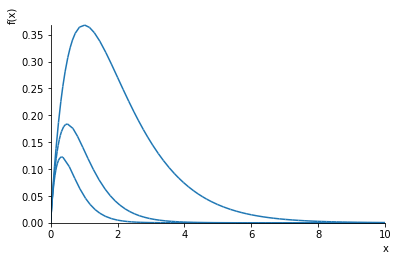

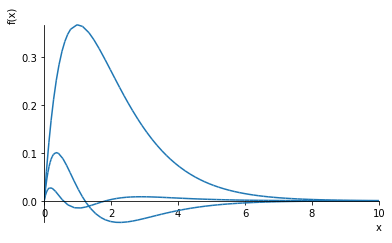

not orthogonal
condition number: 
918.586611068
orthogonal
condition number: 
533.773673247


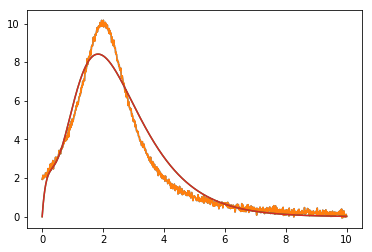

In [6]:
f = x*exp(-x)
g = x*exp(-2*x)
h = x*exp(-3*x)
ortho_basis = gram_schmidt_sym([f,g,h],0,10)
print(ortho_basis)
plot(f,g,h,(x,0,10))
plot(ortho_basis[0],ortho_basis[1],ortho_basis[2],(x,0,10))
lam_f = lambdify(x,f,("numpy"))
lam_g = lambdify(x,g,("numpy"))
lam_h = lambdify(x,h,("numpy"))
lam_of = lambdify(x,ortho_basis[0],("numpy"))
lam_og = lambdify(x,ortho_basis[1],("numpy"))
lam_oh = lambdify(x,ortho_basis[2],("numpy"))
xvals = np.linspace(0,10,1000)
truevals = 10/(1+(xvals-2)**2)+.1*rd.randn(1000)
plt.plot(xvals,truevals)
print("not orthogonal")
coeffs1 = least_squares_fit(xvals,truevals,[lam_f,lam_g,lam_h])

print("orthogonal")
coeffs2 = least_squares_fit(xvals,truevals,[lam_of,lam_og,lam_oh])
plt.plot(xvals,truevals)
plt.plot(xvals,coeffs1[0]*lam_f(xvals)+coeffs1[1]*lam_g(xvals)+coeffs1[2]*lam_h(xvals))
plt.plot(xvals,coeffs2[0]*lam_of(xvals)+coeffs2[1]*lam_og(xvals)+coeffs2[2]*lam_oh(xvals))

[<__main__.ScalarFunction object at 0x7f927dab1780>, <__main__.ScalarFunction object at 0x7f927dab1518>, <__main__.ScalarFunction object at 0x7f927e9df710>]


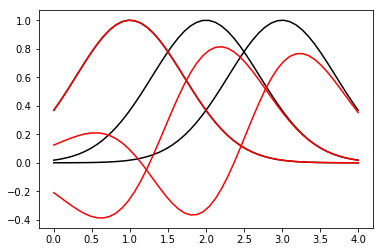

In [179]:
left = 0
right = 4
weight = lambda x: 1
f = ScalarFunction(lambda x: np.exp(-(x-1)**2), weight, left, right)
g = ScalarFunction(lambda x: np.exp(-(x-2)**2), weight, left, right)
h = ScalarFunction(lambda x: np.exp(-(x-3)**2), weight, left, right)
ortho_basis = gram_schmidt_num([f,g,h],0,4)
print(ortho_basis)
xvals = np.linspace(left,right)
plt.plot(xvals,f(xvals),'k')
plt.plot(xvals,g(xvals),'k')
plt.plot(xvals,h(xvals),'k')
plt.plot(xvals,ortho_basis[0](xvals),'r')
plt.plot(xvals,ortho_basis[1](xvals),'r')
plt.plot(xvals,ortho_basis[2](xvals),'r')

In [207]:
left = 0
right = 4
weight = lambda x: 1
a = ScalarFunction(lambda x: np.exp(-(x)**2), weight, left, right)
f = ScalarFunction(lambda x: np.exp(-(x-1)**2), weight, left, right)
g = ScalarFunction(lambda x: np.exp(-(x-2)**2), weight, left, right)
h = ScalarFunction(lambda x: np.exp(-(x-3)**2), weight, left, right)
k = ScalarFunction(lambda x: np.exp(-(x-4)**2), weight, left, right)
t0 = time.time()
ortho_basis = gram_schmidt_num([a,f,g,h,k],0,4)
t1 = time.time()
print("time elapsed: "+str(t1-t0))
xvals = np.linspace(0,4,10)
t0 = time.time()
print(ortho_basis[3](1))
t1 = time.time()
print("time elapsed: "+str(t1-t0))
#plt.figure(figsize=(10,7))
#plt.plot(xvals,ortho_basis[0](xvals))
#plt.plot(xvals,ortho_basis[1](xvals))
#plt.plot(xvals,ortho_basis[2](xvals))
#plt.plot(xvals,ortho_basis[3](xvals))
#plt.plot(xvals,ortho_basis[4](xvals))

time elapsed: 0.00018310546875
0.210433431403
time elapsed: 44.19344711303711


not orthogonal
condition number: 
33.8574204504
orthogonal


KeyboardInterrupt: 

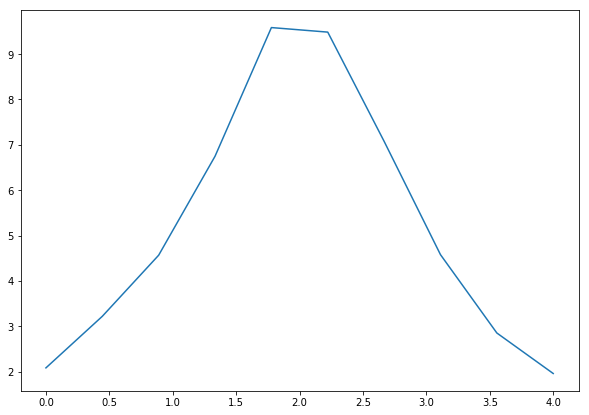

In [201]:
truevals = 10/(1+(xvals-2)**2)+.1*rd.randn(10)
plt.figure(figsize=(10,7))
plt.plot(xvals,truevals)
print("not orthogonal")
coeffs1 = least_squares_fit(xvals,truevals,[a,f,g,h,k])

print("orthogonal")
coeffs2 = least_squares_fit(xvals,truevals,ortho_basis)
def fit_func(basis,coeffs,xvals):
    ans=np.zeros(len(xvals))
    for i in range(len(basis)):
        ans += basis[i](xvals)*coeffs[i]
    return ans
plt.plot(xvals,truevals)
plt.plot(xvals,fit_func([a,f,g,h],coeffs1,xvals))
plt.plot(xvals,fit_func(ortho_basis,coeffs2,xvals))